#### Importing Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#### Importing Data and Starting to Explore

In [12]:
df = pd.read_csv('../data/Indoor_Plant_Health_and_Growth_Factors.csv')
df.head()

,Plant_ID,Height_cm,Leaf_Count,New_Growth_Count,Health_Notes,Watering_Amount_ml,Watering_Frequency_days,Sunlight_Exposure,Room_Temperature_C,Humidity_%,Fertilizer_Type,Fertilizer_Amount_ml,Pest_Presence,Pest_Severity,Soil_Moisture_%,Soil_Type,Health_Score
0,Sansevieria cylindrica,17.39,17,8,Yellowing leaves,205,3,3h direct morning sun,21.7,77.5,Organic,82,Fungus gnats,Moderate,51.9,Clay,1
1,Aloe vera,9.84,31,9,NaN,191,1,3h direct morning sun,22.6,68.9,NaN,91,Aphids,Low,28.2,Loamy,2
2,Ficus lyrata,19.82,40,8,Brittle leaves,477,5,Indirect light all day,17.2,44.3,Liquid feed,90,NaN,High,13.6,Sandy,1
3,Monstera deliciosa,37.08,11,1,New bud,207,1,Low light corner,25.0,72.2,Compost,76,Fungus gnats,Low,38.4,Sandy,4
4,Ficus lyrata,2.96,26,3,Wilting,465,2,Filtered sunlight through curtain,23.2,51.6,Compost,37,Fungus gnats,Low,37.9,Peaty,1


In [13]:
df.describe()

,Height_cm,Leaf_Count,New_Growth_Count,Watering_Amount_ml,Watering_Frequency_days,Room_Temperature_C,Humidity_%,Fertilizer_Amount_ml,Soil_Moisture_%,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.723450,27.038000,4.520000,279.337000,3.424000,23.947600,54.707300,48.383000,34.728700,3.040000
std,10.448949,12.743585,2.844942,124.504598,1.755935,3.161621,14.411996,28.530831,14.511833,1.417889
min,-4.140000,5.000000,0.000000,51.000000,1.000000,14.300000,30.000000,0.000000,10.100000,1.000000
25%,19.030000,16.000000,2.000000,174.750000,2.000000,21.700000,42.100000,25.000000,22.200000,2.000000
50%,25.965000,26.000000,5.000000,279.000000,3.000000,23.900000,54.650000,47.000000,34.100000,3.000000
75%,32.627500,38.000000,7.000000,389.000000,5.000000,26.100000,67.100000,73.250000,47.625000,4.000000
max,57.600000,49.000000,9.000000,499.000000,6.000000,34.600000,80.000000,99.000000,59.900000,5.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Plant_ID                 1000 non-null   object 
 1   Height_cm                1000 non-null   float64
 2   Leaf_Count               1000 non-null   int64  
 3   New_Growth_Count         1000 non-null   int64  
 4   Health_Notes             882 non-null    object 
 5   Watering_Amount_ml       1000 non-null   int64  
 6   Watering_Frequency_days  1000 non-null   int64  
 7   Sunlight_Exposure        1000 non-null   object 
 8   Room_Temperature_C       1000 non-null   float64
 9   Humidity_%               1000 non-null   float64
 10  Fertilizer_Type          805 non-null    object 
 11  Fertilizer_Amount_ml     1000 non-null   int64  
 12  Pest_Presence            798 non-null    object 
 13  Pest_Severity            758 non-null    object 
 14  Soil_Moisture_%          

In [15]:
df.shape

(1000, 17)

In [16]:
df.value_counts('Plant_ID')

Plant_ID
Dracaena trifasciata       59
Monstera deliciosa         56
Aloe vera                  55
Philodendron hederaceum    54
Peperomia obtusifolia      53
Aglaonema commutatum       52
Sansevieria cylindrica     52
Nephrolepis exaltata       52
Begonia maculata           51
Chlorophytum comosum       51
Anthurium andraeanum       50
Spathiphyllum wallisii     49
Schefflera arboricola      49
Epipremnum aureum          49
Zamioculcas zamiifolia     48
Calathea orbifolia         47
Ficus lyrata               46
Codiaeum variegatum        45
Dieffenbachia seguine      41
Tradescantia zebrina       41
Name: count, dtype: int64

In [17]:
df.value_counts('Health_Notes')

Health_Notes
New bud             154
Wilting             129
Yellowing leaves    126
Leaf drop           125
Brittle leaves      121
Strong stem         117
Dark green color    110
Name: count, dtype: int64

In [18]:
df.value_counts('Sunlight_Exposure')

Sunlight_Exposure
3h direct morning sun                219
Filtered sunlight through curtain    206
6h full sun                          202
Indirect light all day               192
Low light corner                     181
Name: count, dtype: int64

In [19]:
df.value_counts('Fertilizer_Type')

Fertilizer_Type
Chemical       216
Liquid feed    202
Compost        196
Organic        191
Name: count, dtype: int64

In [20]:
df.value_counts('Pest_Presence')

Pest_Presence
Whiteflies      212
Spider mites    197
Aphids          196
Fungus gnats    193
Name: count, dtype: int64

In [21]:
df.value_counts('Pest_Severity')

Pest_Severity
Low         264
Moderate    258
High        236
Name: count, dtype: int64

In [22]:
df.value_counts('Soil_Type')

Soil_Type
Clay      173
Chalky    172
Silty     170
Loamy     166
Peaty     160
Sandy     159
Name: count, dtype: int64

In [23]:
df['Soil_Moisture_%'].describe()

count    1000.000000
mean       34.728700
std        14.511833
min        10.100000
25%        22.200000
50%        34.100000
75%        47.625000
max        59.900000
Name: Soil_Moisture_%, dtype: float64

In [25]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### I noticed there weren't really any missing values in the columns I cared about. I am trying to focus on the columns where numeric data from sensors can be used to predict plant health at any given time. I then started plotting things I thought would have a strong correlation (I realized later I could do .corr or make a heat map)

In [41]:
graphSet = df[['Plant_ID', 'Room_Temperature_C', 'Health_Score']]

<AxesSubplot: xlabel='Room_Temperature_C', ylabel='Health_Score'>

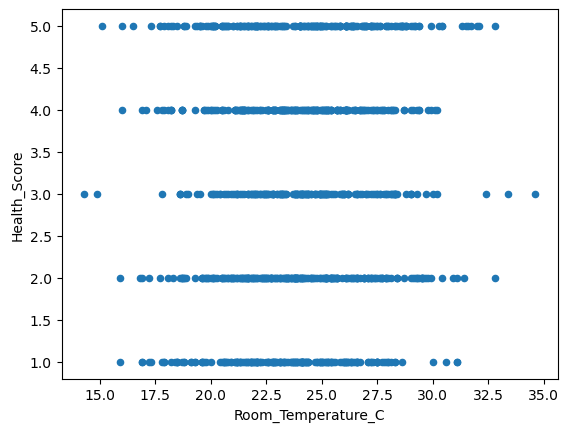

In [60]:
graphSet.plot.scatter(x='Room_Temperature_C', y='Health_Score')

In [43]:
leafTest = df.groupby(df['Leaf_Count'] > 3)

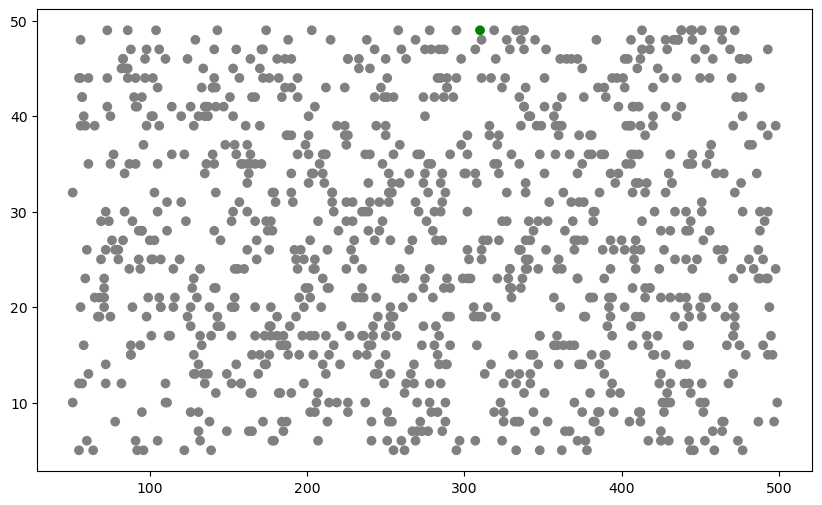

In [44]:
plt.figure(figsize=(10, 6))
max_value = df["Leaf_Count"].idxmax()
colors = ["green" if leaf == max_value else "gray" for leaf in df.index]
plt.scatter(df["Watering_Amount_ml"], df['Leaf_Count'], color=colors)
plt.show()

In [45]:
most_plants = df[df['Plant_ID'] == "Dracaena trifasciata"]
most_plants.head()

,Plant_ID,Height_cm,Leaf_Count,New_Growth_Count,Health_Notes,Watering_Amount_ml,Watering_Frequency_days,Sunlight_Exposure,Room_Temperature_C,Humidity_%,Fertilizer_Type,Fertilizer_Amount_ml,Pest_Presence,Pest_Severity,Soil_Moisture_%,Soil_Type,Health_Score
42,Dracaena trifasciata,29.84,37,4,Wilting,259,5,6h full sun,25.2,76.3,NaN,15,Fungus gnats,Low,51.4,Clay,4
57,Dracaena trifasciata,23.31,19,3,Strong stem,377,2,3h direct morning sun,19.9,44.6,Liquid feed,37,Fungus gnats,High,18.5,Silty,4
79,Dracaena trifasciata,32.47,9,6,Leaf drop,279,3,3h direct morning sun,24.8,76.5,Liquid feed,6,Fungus gnats,High,53.1,Sandy,1
86,Dracaena trifasciata,38.08,23,5,Strong stem,299,1,3h direct morning sun,28.6,57.2,Chemical,31,NaN,Low,37.0,Peaty,5
88,Dracaena trifasciata,21.22,6,2,Leaf drop,132,5,6h full sun,21.9,33.8,Compost,1,Whiteflies,Moderate,31.1,Clay,3


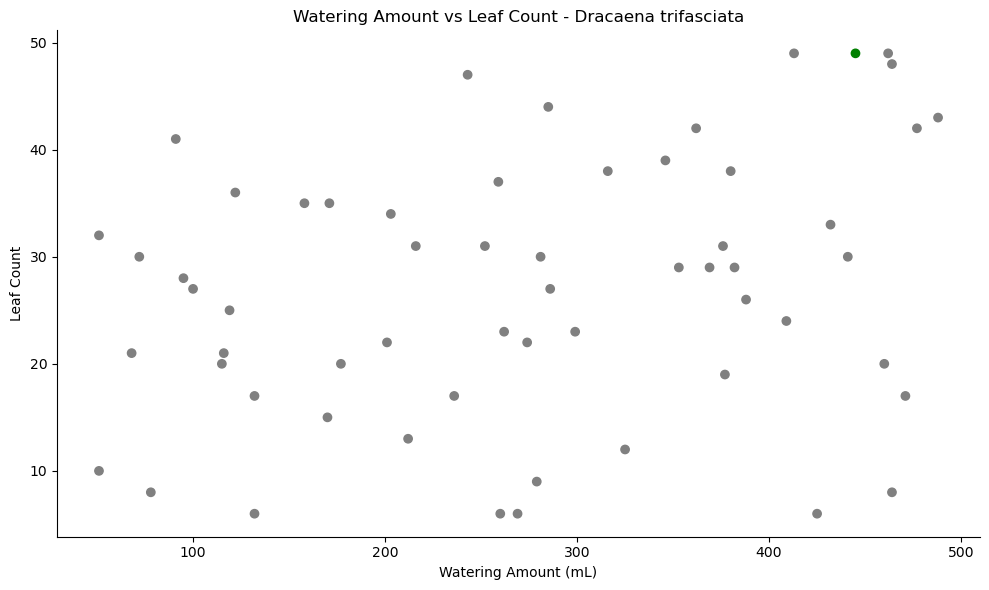

In [59]:
plt.figure(figsize=(10, 6))
max_value = most_plants["Leaf_Count"].idxmax()
colors = ["green" if leaf == max_value else "gray" for leaf in most_plants.index]
plt.scatter(most_plants["Watering_Amount_ml"], most_plants['Leaf_Count'], color=colors)
plt.title("Watering Amount vs Leaf Count - Dracaena trifasciata")
plt.xlabel("Watering Amount (mL)")
plt.ylabel("Leaf Count")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

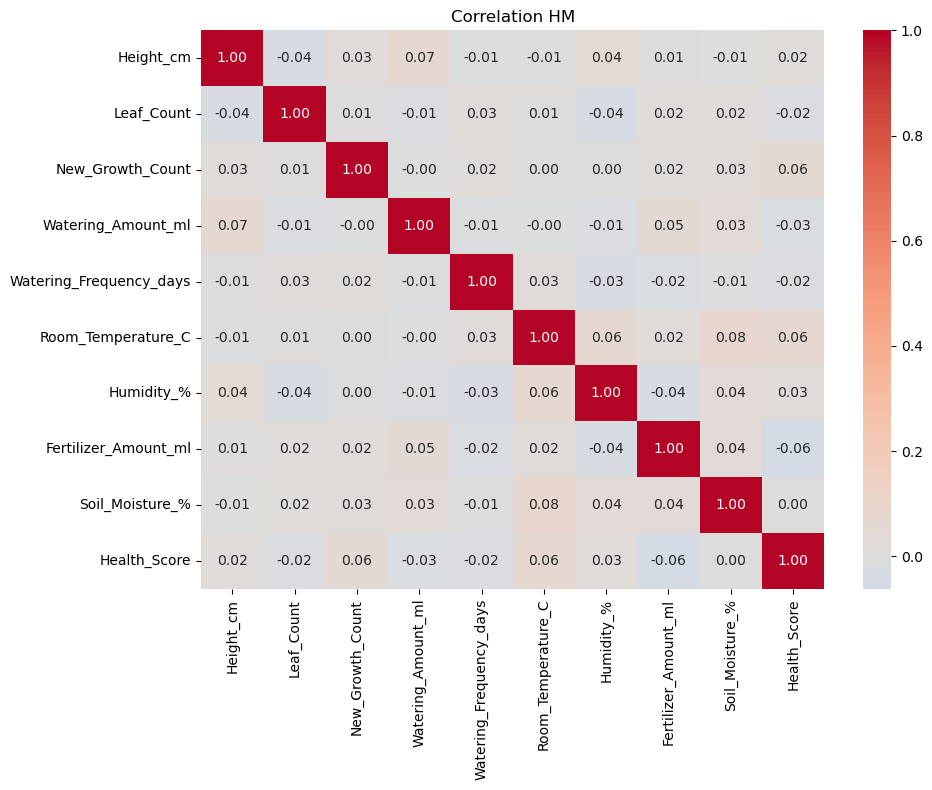

In [26]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation HM")
plt.tight_layout()
plt.show()

In [27]:
# Need to potentially map some of the categorical columns to numerical/change data type.

#### I will likely go back to apply some data cleaning/conversion techniques for practice. But this was the point that I realized that the data set that I chose was synthetic and I would most likely need to supplement somehow.

#### I was really struggling to find another house plant data set... they were either all synthetic or had weak data, or they weren't tying the data to a health score. Because the original dataset had no correlation between anything basically I figured it would be impossible to merge and make assumptions based on rules to assign a health score.

#### I felt I needed to pivot a bit again, so I found a site that allowed me to export data about plants in the wild. I am mainly interested in the X, Y coordinates of this dataset. My thought was to find where the plant most commonly occurs in the wild, and isolate it to those countries or regions. The same plant is found in different areas of the world or countries, but my thought process is that if it is the most common in one place it is likely thriving there.

#### Haven't done this yet --- Then what I am going to do is use the X, Y coordinates somehow... if I can get weather data based solely on coordinates it may be good to get an average of the coordinates and either get data from them or find the nearest weather station and get data for at least a year. Then I will use that weather data tied to the plant species to develop the "ideal conditions" for house plants.

#### ------------------

#### Importing data and making sure it looks correct

In [28]:
df2 = pd.read_csv('../data/gbif_occurrences.csv')

In [29]:
df2.head()

,input_name,species,lat,lon,year,country
0,Dracaena trifasciata,Dracaena trifasciata,24.507833,120.845436,2025.0,Chinese Taipei
1,Dracaena trifasciata,Dracaena trifasciata,21.234703,-86.802909,2025.0,Mexico
2,Dracaena trifasciata,Dracaena trifasciata,20.466830,-105.292375,2025.0,Mexico
3,Dracaena trifasciata,Dracaena trifasciata,27.871088,-82.262016,2025.0,United States of America
4,Dracaena trifasciata,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia


In [30]:
df2.value_counts("input_name")

input_name
Philodendron hederaceum    2000
Tradescantia zebrina       2000
Chlorophytum comosum       2000
Codiaeum variegatum        2000
Dieffenbachia seguine      2000
Dracaena trifasciata       2000
Epipremnum aureum          2000
Aloe vera                  2000
Monstera deliciosa         2000
Peperomia obtusifolia      2000
Nephrolepis exaltata       1471
Anthurium andraeanum        767
Ficus lyrata                748
Begonia maculata            377
Aglaonema commutatum        338
Schefflera arboricola       334
Spathiphyllum wallisii      325
Sansevieria cylindrica      278
Zamioculcas zamiifolia      169
Calathea orbifolia           19
Name: count, dtype: int64

In [31]:
philodendron_df = df2[df2['input_name'] == "Philodendron hederaceum"]
philodendron_df.value_counts("country")

country
Colombia                            410
Mexico                              256
Panama                              230
Costa Rica                          220
Brazil                              199
United States of America            151
Chinese Taipei                       75
Belize                               53
Puerto Rico                          35
Peru                                 33
Singapore                            30
French Guiana                        28
Nicaragua                            27
Australia                            26
Guadeloupe                           21
Suriname                             19
Ecuador                              18
Honduras                             17
Trinidad and Tobago                  17
Hong Kong                            14
Seychelles                           12
Guatemala                            11
El Salvador                          10
Philippines                           6
Indonesia                       

In [32]:
philodendron_colombia = philodendron_df[philodendron_df['country'] == "Colombia"]
philodendron_colombia.head()

,input_name,species,lat,lon,year,country
6038,Philodendron hederaceum,Philodendron hederaceum,5.894380,-74.857612,2025.0,Colombia
6044,Philodendron hederaceum,Philodendron hederaceum,5.694361,-75.699782,2025.0,Colombia
6050,Philodendron hederaceum,Philodendron hederaceum,11.131386,-74.119259,2025.0,Colombia
6051,Philodendron hederaceum,Philodendron hederaceum,11.135275,-74.117570,2025.0,Colombia
6052,Philodendron hederaceum,Philodendron hederaceum,11.129407,-74.119045,2025.0,Colombia


#### Creating a list of all plant names to use in a function that will return all of their most common countries 

In [33]:
plant_names = []
for plant in df2['input_name'].unique():
    plant_names.append(plant)

plant_names

['Dracaena trifasciata',
 'Monstera deliciosa',
 'Aloe vera',
 'Philodendron hederaceum',
 'Peperomia obtusifolia',
 'Aglaonema commutatum',
 'Sansevieria cylindrica',
 'Nephrolepis exaltata',
 'Begonia maculata',
 'Chlorophytum comosum',
 'Anthurium andraeanum',
 'Spathiphyllum wallisii',
 'Schefflera arboricola',
 'Epipremnum aureum',
 'Zamioculcas zamiifolia',
 'Calathea orbifolia',
 'Ficus lyrata',
 'Codiaeum variegatum',
 'Dieffenbachia seguine',
 'Tradescantia zebrina']

### FULL DISCLOSURE - I used CHATGPT to help with the rest of the cells below. There were some things I needed to figure out how to do and I didn't have a ton of time in the moment to sift through documentation or the internet. I am going to make an effort to understand everything it gave me, or re-do this in a more simple way even if it isn't as clean.

#### Creating function to get each plant's highest count by country and storing it in a variable

In [34]:
def getCountryMode(df, list):
    country_mode = df.dropna(subset='country').groupby('input_name')['country'].agg(lambda s: s.mode().iloc[0])
    High_Pop_Country_df = df[df['country'] == df['input_name'].map(country_mode)]
    return High_Pop_Country_df

In [35]:
high_pop = getCountryMode(df2, plant_names)

#### Mapping plants by their X, Y coordinates

/tmp/ipykernel_25453/291796557.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


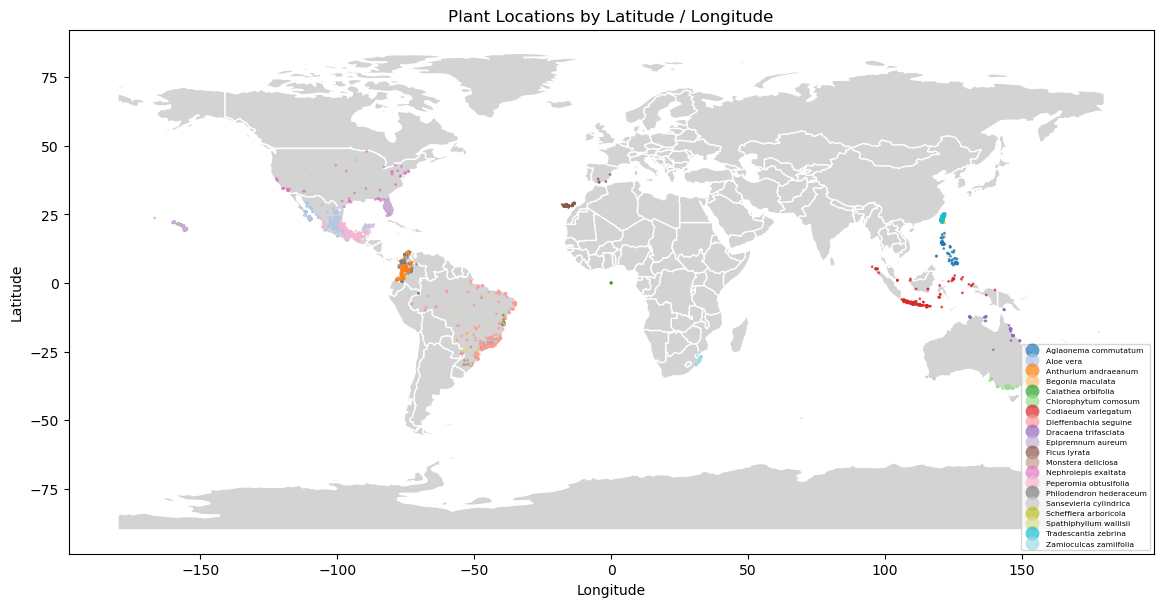

In [36]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


gdf = gpd.GeoDataFrame(
    high_pop,
    geometry=gpd.points_from_xy(high_pop['lon'], high_pop['lat']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax, color="lightgray", edgecolor="white")
gdf.plot(
    ax=ax,
    column="input_name",
    legend=True,
    legend_kwds={"loc": "lower right", "fontsize": 5.5},
    cmap="tab20",
    markersize=1,
    alpha=0.7
)

ax.set_title("Plant Locations by Latitude / Longitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


#### Creating a function that adds a column for lat and lon storing the coordinate closest to the center of each plant's coordinate group. Then merging it with the gdf dataframe to create gdf2

In [ ]:
def closest_to_center(group):
    lat0 = group["lat"].mean()
    lon0 = group["lon"].mean()
    d2 = (group["lat"] - lat0)**2 + (group["lon"] - lon0)**2
    return group.loc[d2.idxmin(), ["input_name", "lat", "lon"]]

rep = (
    gdf[["input_name", "lat", "lon"]]
      .groupby("input_name", group_keys=False)
      .apply(closest_to_center)
      .reset_index(drop=True)
      .rename(columns={"lat": "rep_lat", "lon": "rep_lon"})
)


In [38]:
gdf2 = gdf.merge(rep, on="input_name", how="left")

gdf2.head()


,input_name,species,lat,lon,year,country,geometry,rep_lat,rep_lon
0,Dracaena trifasciata,Dracaena trifasciata,-25.246486,152.667831,2025.0,Australia,POINT (152.66783 -25.24649),-23.950202,151.373212
1,Dracaena trifasciata,Dracaena trifasciata,-27.433691,152.996961,2025.0,Australia,POINT (152.99696 -27.43369),-23.950202,151.373212
2,Dracaena trifasciata,Dracaena trifasciata,-34.053950,151.147339,2025.0,Australia,POINT (151.14734 -34.05395),-23.950202,151.373212
3,Dracaena trifasciata,Dracaena trifasciata,-27.492125,152.986496,2025.0,Australia,POINT (152.98650 -27.49213),-23.950202,151.373212
4,Dracaena trifasciata,Dracaena trifasciata,-33.799053,151.155211,2025.0,Australia,POINT (151.15521 -33.79905),-23.950202,151.373212


#### NEXT STEPS - NEED TO MAP THE CLOSEST TO CENTER COORDS TO CONFIRM NOTHING WEIRD. THEN TIE WEATHER DATA TO THOSE COORDS TO HAVE DATA FOR EACH DAY OVER THE LAST YEAR IN THEIR NATURAL HABITAT